<a href="https://colab.research.google.com/github/Mildredkulei7/Carrefour_sales_analysis/blob/main/Part1%262_Dimentionality_reduction%24Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Definition
## 1.1 Specifying the Question
### what is the most relevant marketing strategies that will result in the highest no. of sales (total price including tax) in carrefour Kenya.

## 1.2 Metric for success
### Come up with an analysis that will make our client identify the relevant marketing strategies to increase the company's sales.

## 1.3 Understanding the Context
### Carrefour was launched in kenya in 1999 and today it operates five hypermarkets and five supermarkets, employing over 1800 colleagues.

###Carrefour operates different store formats, to meet the growing needs of its diversified customer base. In line with the brand’s commitment to provide the widest range of quality products and value for money, Carrefour offers an unrivalled choice of more than 30,000 food and non-food products, and an exemplary customer experience to create great moments for everyone every day. In respect to this, the marketing team wants to be informed on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 



## 1.4 Experimental Design taken
1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  
6. Implement the Solution
7. Recommendation

## 1.5 Data relevance 
### The data collected is relevant as it is was provided by the client from the company's database. 


# 2. Data Sourcing
## Loading the data
## Loading the necessary packages

In [5]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R

install.packages("data.table")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5303849 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [9]:
%%R

sales1 <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")

# 3. checking the data

In [10]:
##Previewing the first 6 rows of dataset
%%R
head(sales1)

   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
6 699-14-3026      C        Normal   Male Electronic accessories      85.39
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905


In [11]:
%%R
##Previewing the last 6 rows of dataset

tail(sales1)

      Invoice.ID Branch Customer.type Gender           Product.line Unit.price
995  652-49-6720      C        Member Female Electronic accessories      60.95
996  233-67-5758      C        Normal   Male      Health and beauty      40.35
997  303-96-2227      B        Normal Female     Home and lifestyle      97.38
998  727-02-1313      A        Member   Male     Food and beverages      31.84
999  347-56-2442      A        Normal   Male     Home and lifestyle      65.82
1000 849-09-3807      A        Member Female    Fashion accessories      88.34
     Quantity     Tax      Date  Time Payment   cogs gross.margin.percentage
995         1  3.0475 2/18/2019 11:40 Ewallet  60.95                4.761905
996         1  2.0175 1/29/2019 13:46 Ewallet  40.35                4.761905
997        10 48.6900  3/2/2019 17:16 Ewallet 973.80                4.761905
998         1  1.5920  2/9/2019 13:22    Cash  31.84                4.761905
999         1  3.2910 2/22/2019 15:33    Cash  65.82          

In [12]:
%%R
##Basic structure of the data
str(sales1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

Here we can see the variables that are character and in number datatypes

In [13]:
%%R
# previewing the column names
colnames(sales1)

 [1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  


In [14]:
%%R
# previewing the dataset
class(sales1)

[1] "data.frame"


our sales1 is in for of a dataframe.

In [15]:
%%R
# previewing the datatypes of the dataset
sapply(sales1, class)

             Invoice.ID                  Branch           Customer.type 
            "character"             "character"             "character" 
                 Gender            Product.line              Unit.price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric" 


There is datatypes of character, integer and number.

In [17]:
%%R
# checking the shape of the data
dim(sales1)

[1] 1000   16


The dataset has 1000 records of data and 16 columns.

# 4. Perform Data Cleaning

## missing values

In [18]:
%%R
# checking for missing values
sum(is.na(sales1))

[1] 0


no missing values.

## Duplicates

In [19]:
%%R
# Identifying duplicates
duplicates <- sales1[duplicated(sales1), ]
head(duplicates)

 [1] Invoice.ID              Branch                  Customer.type          
 [4] Gender                  Product.line            Unit.price             
 [7] Quantity                Tax                     Date                   
[10] Time                    Payment                 cogs                   
[13] gross.margin.percentage gross.income            Rating                 
[16] Total                  
<0 rows> (or 0-length row.names)


There are no duplicates

## Outliers

In [22]:
%%R
#install.packages("dplyr")    # alternative installation of the %>%

library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:data.table’:

    between, first, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




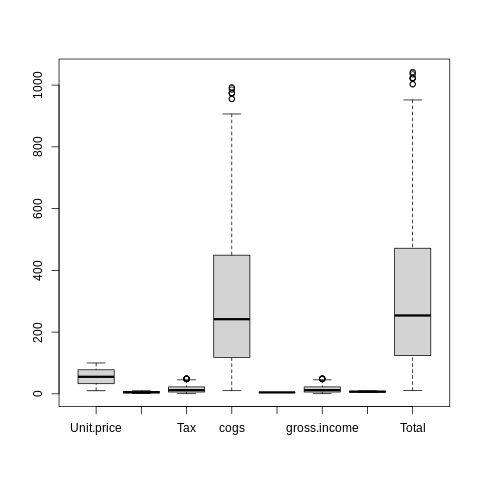

In [23]:
%%R
numeric_df <- sales1 %>% select_if(is.numeric)
boxplot(numeric_df)

We notice that the column Cogs and Total have a few outliers

changing column names to make them uniform

In [25]:
%%R
colnames(sales1) = tolower(colnames(sales1))

#to confirm the change
names (sales1)

 [1] "invoice.id"              "branch"                 
 [3] "customer.type"           "gender"                 
 [5] "product.line"            "unit.price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "rating"                  "total"                  


Dropping columns that we do not need

In [26]:
%%R
#gross.income and tax are the same so we will drop one, 
#we also don't need invoice id in our analysis.

sales1[ ,c('tax','invoice.id')] <- list(NULL)

#to confirm they have been deleted
names(sales1)

 [1] "branch"                  "customer.type"          
 [3] "gender"                  "product.line"           
 [5] "unit.price"              "quantity"               
 [7] "date"                    "time"                   
 [9] "payment"                 "cogs"                   
[11] "gross.margin.percentage" "gross.income"           
[13] "rating"                  "total"                  


In [27]:
%%R
#separating the date column into 'year','month','day'
library(tidyr)

sales1_date <- separate(sales1, date, c("month", "day", "year"))
head(sales1_date,n=2) 

  branch customer.type gender           product.line unit.price quantity month
1      A        Member Female      Health and beauty      74.69        7     1
2      C        Normal Female Electronic accessories      15.28        5     3
  day year  time payment   cogs gross.margin.percentage gross.income rating
1   5 2019 13:08 Ewallet 522.83                4.761905      26.1415    9.1
2   8 2019 10:29    Cash  76.40                4.761905       3.8200    9.6
     total
1 548.9715
2  80.2200


We notice that our data is from the year 2019

In [28]:
%%R

library(tidyverse)
library(magrittr) 

#Factors are used to represent categorical data and are important for statistical analysis and for plotting.
#For the categorical data we will change to levels

sales1_cat= c('branch', 'customer.type', 'gender', 'product.line', 'payment', 'year','month','day')

# Changing columns to factors

sales1_date[,sales1_cat] %<>% lapply(function(x) as.factor(as.character(x)))
str(sales1_date)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

R[write to console]: 
Attaching package: ‘magrittr’


R[write to console]: The following object is masked from ‘package:purrr’:

    set_names


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract




'data.frame':	1000 obs. of  16 variables:
 $ branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ month                  : Factor w/ 3 levels "1","2","3": 1 3 3 1 2 3 2 2 1 2 ...
 $ day                    : Factor w/ 31 levels "1","10","11",..: 27 30 23 20 30 18 18 17 2 13 ...
 $ year                   : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...
 $ time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 

We observe that:
there rae two types of customer; member and normal.
There are three branches.
there are two types of gender.
There are three types of payments.
the data is only for 2019.
we have 3 months and 31 days.
there are 6 types of product line.

In [30]:
%%R
#we separate our datatypes columns we divide them into numerical and into categorical
# we had already defined categorical but need numerical

sales1_num <- subset(sales1_date, select = c(unit.price, quantity,cogs,gross.margin.percentage, gross.income, rating ,total))
head(sales1_num,n=3)


  unit.price quantity   cogs gross.margin.percentage gross.income rating
1      74.69        7 522.83                4.761905      26.1415    9.1
2      15.28        5  76.40                4.761905       3.8200    9.6
3      46.33        7 324.31                4.761905      16.2155    7.4
     total
1 548.9715
2  80.2200
3 340.5255


In [31]:
%%R
#we can go ahead and change the above dataframes into tibbles for easier 
sales1_numt<-as_tibble(sales1_num)
head(sales1_numt,n=3)

# A tibble: 3 × 7
  unit.price quantity  cogs gross.margin.percentage gross.income rating total
       <dbl>    <int> <dbl>                   <dbl>        <dbl>  <dbl> <dbl>
1       74.7        7 523.                     4.76        26.1     9.1 549. 
2       15.3        5  76.4                    4.76         3.82    9.6  80.2
3       46.3        7 324.                     4.76        16.2     7.4 341. 


In [33]:
%%R
sales1_cat <- subset(sales1_date, select = c(branch, customer.type, gender, product.line, payment, year,month,day))
head(sales1_cat,n=3)

  branch customer.type gender           product.line     payment year month day
1      A        Member Female      Health and beauty     Ewallet 2019     1   5
2      C        Normal Female Electronic accessories        Cash 2019     3   8
3      A        Normal   Male     Home and lifestyle Credit card 2019     3   3
  branch customer.type gender           product.line     payment year month day
1      A        Member Female      Health and beauty     Ewallet 2019     1   5
2      C        Normal Female Electronic accessories        Cash 2019     3   8
3      A        Normal   Male     Home and lifestyle Credit card 2019     3   3


In [34]:
%%R
#category columns as tible
sales1_cat_t<-as_tibble(sales1_cat)
head(sales1_cat_t,n=3)

# A tibble: 3 × 8
  branch customer.type gender product.line          payment    year  month day  
  <fct>  <fct>         <fct>  <fct>                 <fct>      <fct> <fct> <fct>
1 A      Member        Female Health and beauty     Ewallet    2019  1     5    
2 C      Normal        Female Electronic accessori… Cash       2019  3     8    
3 A      Normal        Male   Home and lifestyle    Credit ca… 2019  3     3    


# 5. Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)


## 5.1 Univariate Analysis

In [43]:
%%R

library(ggplot2)


#Descriptive analysis into measures of central Tendency

describe(sales1_numt)

R[write to console]: Error in describe(sales1_numt) : could not find function "describe"




Error in describe(sales1_numt) : could not find function "describe"


RInterpreterError: ignored

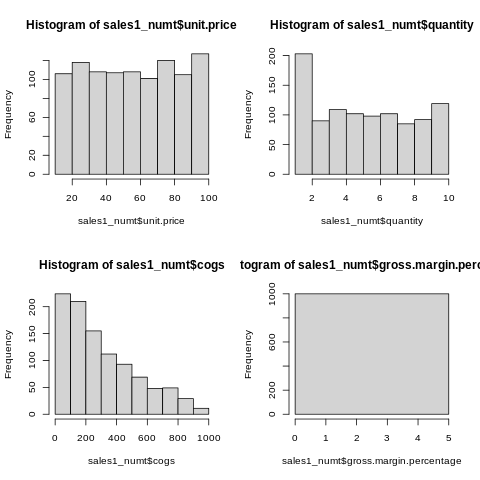

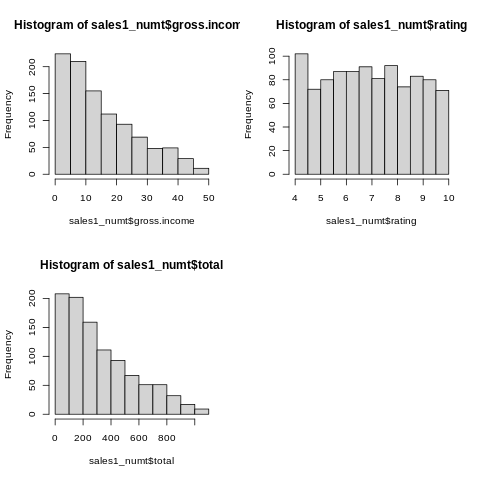

In [45]:
%%R

par(mfrow = c(2, 2))
hist(sales1_numt$unit.price)
hist(sales1_numt$quantity)
hist(sales1_numt$cogs) 
hist(sales1_numt$gross.margin.percentage) 
hist(sales1_numt$gross.income) 
hist(sales1_numt$rating) 
hist(sales1_numt$total)

In [46]:
%%R

par(mfrow = c(2, 2))
f1 <- sales1_cat$branch
f1y<- table(f1) 
head.matrix(f1y)
f2 <- sales1_cat$customer.type
f2y<- table(f2) 
head.matrix(f2y)
f3 <- sales1_cat$gender 
f3y<- table(f3)
head.matrix(f3y)
f4 <- sales1_cat$product.line 
f4y<- table(f4) 
head.matrix(f4y)
f5 <- sales1_cat$payment
f5y<- table(f5)
head.matrix(f5y)
f6 <- sales1_cat$month
f6y<- table(f6) 
head.matrix(f6y)
f7 <- sales1_cat$day 
f7y<- table(f7)
head.matrix(f7y)

f7
 1 10 11 12 13 14 
28 32 27 31 28 39 


the higest bought product is fashion accessories, and the lowest is health and beauty.

the customer types both ahve almos same number of customers.
the first month had highest sales then followed by the third and lastly the secodn month.

both genders have almost same numbers.


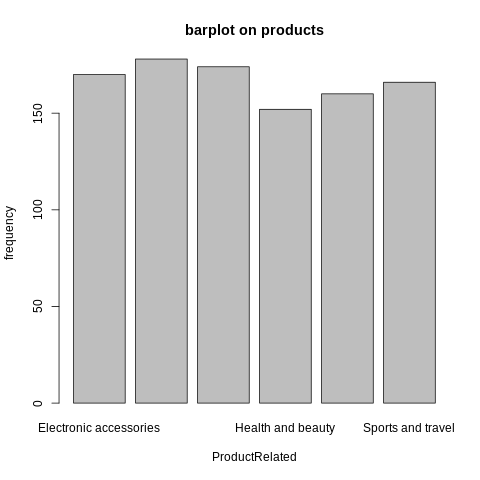

In [47]:
%%R

# fetching the columns
products <- sales1_cat$product.line

# fetching the frequency distribution
product_frequency <- table(products)

# plotting the bargraph
barplot(product_frequency,  xlab = 'ProductRelated', ylab = 'frequency',  main = 'barplot on products')

Health and beauty had the lowest sales though not much worrying difference.

## 5.2 Bivariate analysis

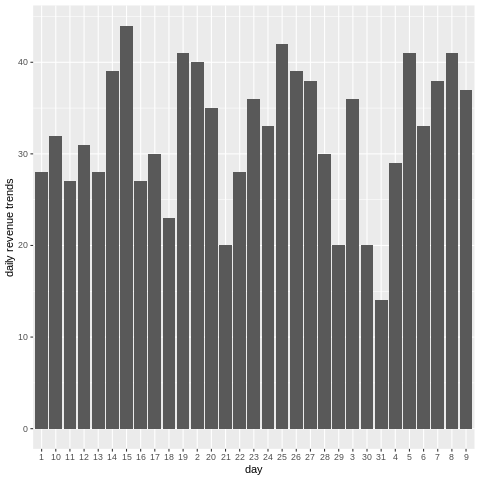

In [48]:
%%R

sales1_date %>%
ggplot() +
aes(x = day, gross.income = ..count../nrow(sales1_date), fill = gross.income) +
geom_bar() +
ylab("daily revenue trends")

Day 15 had most highest revenue collected followed by day 25th, day 31 had the lowest revenue collected.

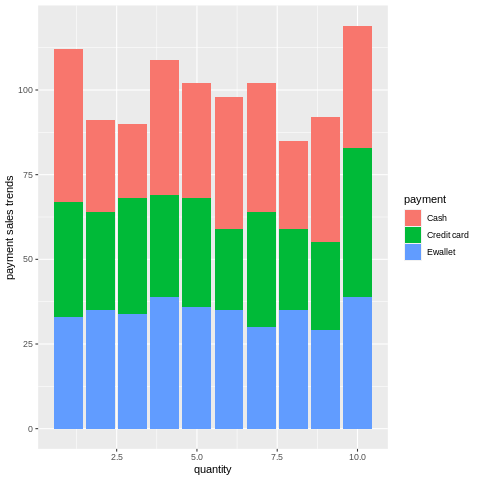

In [49]:
%%R

sales1_date %>%
ggplot() +
aes(x = quantity, payment = ..count../nrow(sales1_date), fill = payment) +
geom_bar() +
ylab("payment sales trends")

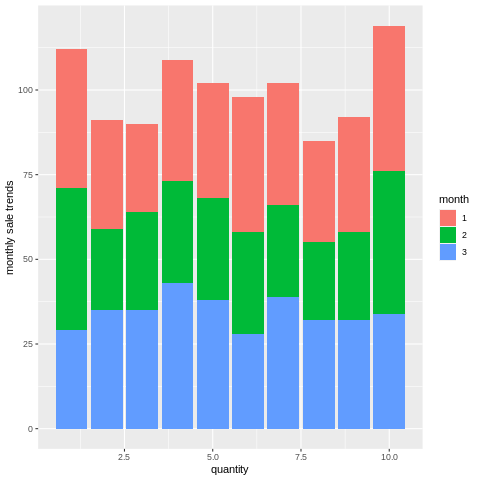

In [50]:
%%R

sales1_date %>%
ggplot() +
aes(x = quantity, month = ..count../nrow(sales1_date), fill = month) +
geom_bar() +
ylab("monthly sale trends")

Month 1, customers who bought 10 items where high, and those who bought 8 items where the lowest.

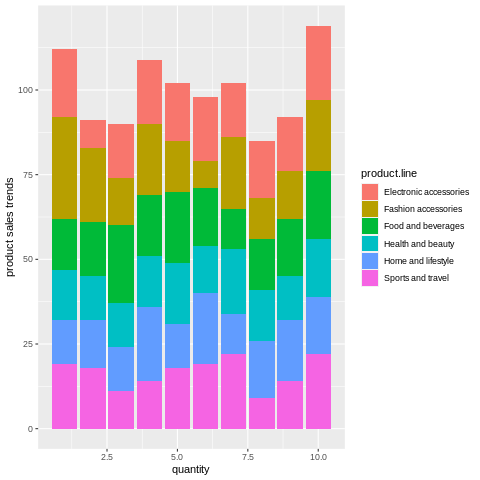

In [51]:
%%R

sales1_date %>%
ggplot() +
aes(x = quantity, product.line = ..count../nrow(sales1_date), fill = product.line) +
geom_bar() +
ylab("product sales trends")

most customers take 10 items of electronic accessories, 

fashion accessories, health & beauty and food & bevarages

6 items of home&lifestyle had most sales

7 items of sports&travel had most sales.

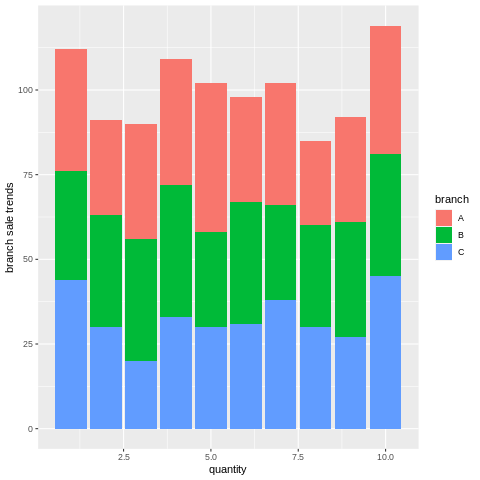

In [52]:
%%R

sales1_date %>%
ggplot() +
aes(x = quantity, branxh = ..count../nrow(sales1_date), fill = branch) +
geom_bar() +
ylab("branch sale trends")

all the branches had most of its customers purches 10 items

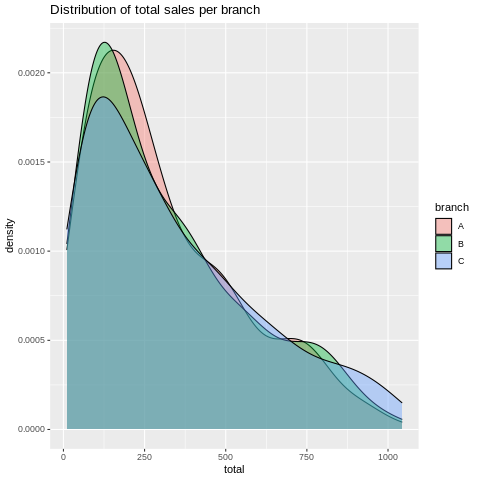

In [53]:
%%R

#Distribution of income per Branch
ggplot(sales1_date,aes(x = total, fill = branch)) +geom_density(alpha = 0.4) +labs(title = "Distribution of total sales per branch")

branch A and B have highest sales between 1 & 300, then all branches experience low sales toward 100 shilling.

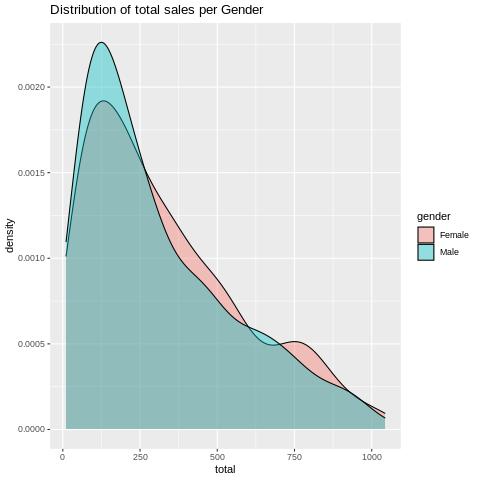

In [54]:
%%R

#Distribution of income per Gender
ggplot(sales1_date,aes(x = total, fill = gender)) +geom_density(alpha = 0.4) +labs(title = "Distribution of total sales per Gender")

the female buy items totaling to 250 more than males, while the males buy items totalling to a thousand more tha females.

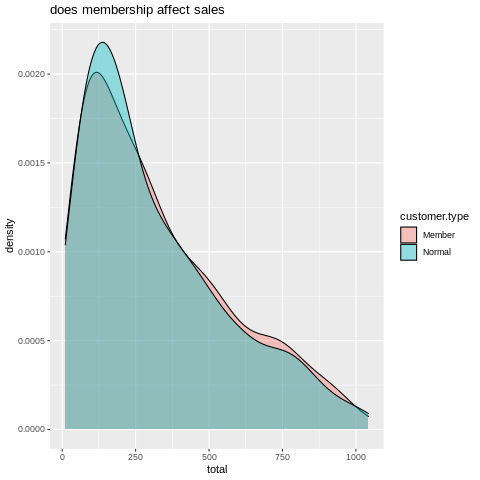

In [55]:
%%R
#Distribution of income per Gender
ggplot(sales1_date,aes(x = total, fill = customer.type)) +geom_density(alpha = 0.4) +labs(title = "does membership affect sales")

cystomer type-member generate more sales than the normal type.

In [73]:
%%R

install.packages("ggplot2")
install.packages("corrplot")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3063309 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [57]:
%%R

#Printing out correlations in our dataset
cols <-cor(sales1_num)
cols

                          unit.price    quantity       cogs
unit.price               1.000000000  0.01077756  0.6339621
quantity                 0.010777564  1.00000000  0.7055102
cogs                     0.633962089  0.70551019  1.0000000
gross.margin.percentage           NA          NA         NA
gross.income             0.633962089  0.70551019  1.0000000
rating                  -0.008777507 -0.01581490 -0.0364417
total                    0.633962089  0.70551019  1.0000000
                        gross.margin.percentage gross.income       rating
unit.price                                   NA    0.6339621 -0.008777507
quantity                                     NA    0.7055102 -0.015814905
cogs                                         NA    1.0000000 -0.036441705
gross.margin.percentage                       1           NA           NA
gross.income                                 NA    1.0000000 -0.036441705
rating                                       NA   -0.0364417  1.000000000
to

In [59]:
%%R
#removing the grossmargin percantage as it has std of 0.
sales1_numt[ ,c('gross.margin.percentage')] <- list(NULL)

In [60]:
%%R

#Printing out correlations in our dataset
cols <-cor(sales1_numt)
cols

               unit.price    quantity       cogs gross.income       rating
unit.price    1.000000000  0.01077756  0.6339621    0.6339621 -0.008777507
quantity      0.010777564  1.00000000  0.7055102    0.7055102 -0.015814905
cogs          0.633962089  0.70551019  1.0000000    1.0000000 -0.036441705
gross.income  0.633962089  0.70551019  1.0000000    1.0000000 -0.036441705
rating       -0.008777507 -0.01581490 -0.0364417   -0.0364417  1.000000000
total         0.633962089  0.70551019  1.0000000    1.0000000 -0.036441705
                  total
unit.price    0.6339621
quantity      0.7055102
cogs          1.0000000
gross.income  1.0000000
rating       -0.0364417
total         1.0000000


R[write to console]: corrplot 0.90 loaded



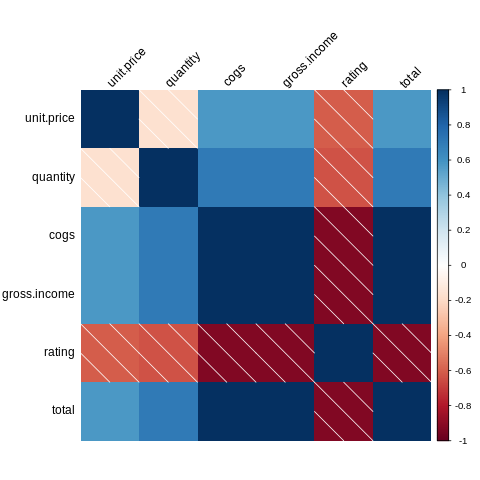

In [75]:
%%R
library('corrplot')
corrplot(cor(cols), method="shade", tl.col="black", tl.srt=45)

There is an evident of positive correlation between the following columns:

cogs
gross income
total
unit price

The following columns are negatively linear:

rating
quantity

# 6. Implement the Solution

## Part 1: Dimensionality Reduction
### PCA

In [63]:
%%R

#We had already ran the numericals and dropped redundant columns 
#we named it sales1_numt

pca <- prcomp(sales1_numt[,c(1:6)], center = TRUE, scale = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4      PC5       PC6
Standard deviation     1.9817 1.0002 0.9939 0.2909 1.57e-16 1.327e-16
Proportion of Variance 0.6545 0.1667 0.1646 0.0141 0.00e+00 0.000e+00
Cumulative Proportion  0.6545 0.8213 0.9859 1.0000 1.00e+00 1.000e+00


Proportion of Variance: This is the amount of variance the component accounts for in the data, ie PC1 accounts for 65.5% of total variance in the data alone!

Cumulative Proportion: This is simply the accumulated amount of explained variance, ie. if we used the first 3 components we would be able to account for 98% of total variance in the data


In [64]:
%%R

#used the string function to know which variables were to be consindered
str(pca)

List of 5
 $ sdev    : num [1:6] 1.98 1.00 9.94e-01 2.91e-01 1.57e-16 ...
 $ rotation: num [1:6, 1:6] -0.3281 -0.3649 -0.5029 -0.5029 0.0217 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "unit.price" "quantity" "cogs" "gross.income" ...
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:6] 55.67 5.51 307.59 15.38 6.97 ...
  ..- attr(*, "names")= chr [1:6] "unit.price" "quantity" "cogs" "gross.income" ...
 $ scale   : Named num [1:6] 26.49 2.92 234.18 11.71 1.72 ...
  ..- attr(*, "names")= chr [1:6] "unit.price" "quantity" "cogs" "gross.income" ...
 $ x       : num [1:1000, 1:6] -1.781 2.087 -0.173 -1.343 -2.497 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Here we note the center point ($center), scaling ($scale),standard deviation(sdev) of each principal component.

The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components ($rotation). 

The values of each sample in terms of the principal components ($x)

In [85]:
%%R

# We will now plot our pca. This will provide us with some very useful insights

# Installing our ggbiplot visualisation package
# 
library('devtools')
#install_github("vqv/ggbiplot")

In [86]:
%%R

# Then Loading our ggbiplot library
#  

install_github("vqv/ggbiplot")


R[write to console]: Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



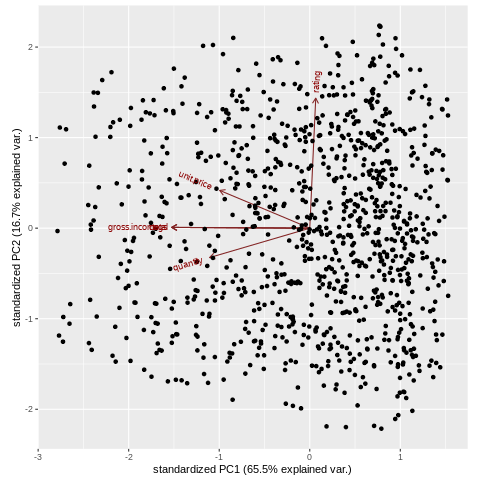

In [96]:
%%R

#install.packages("ggplot2")
library('ggbiplot')
ggbiplot(pca)

we notice that unit price, quantity, rating and grossincome were the four variables to be highly consindered during modelling.

In [94]:
%%R
#adding more details
#plotting the PCA to see the above visually
#we will use ggbiplot library
#install.packages('ggbiplot')
library('ggbiplot')

R[write to console]: Loading required package: plyr

R[write to console]: ------------------------------------------------------------------------------

R[write to console]: You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

R[write to console]: ------------------------------------------------------------------------------

R[write to console]: 
Attaching package: ‘plyr’


R[write to console]: The following object is masked from ‘package:purrr’:

    compact


R[write to console]: The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


R[write to console]: Loading required package: scales

R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following object is masked from ‘package:purrr’:

    discard


R[write to console]: The following object is 

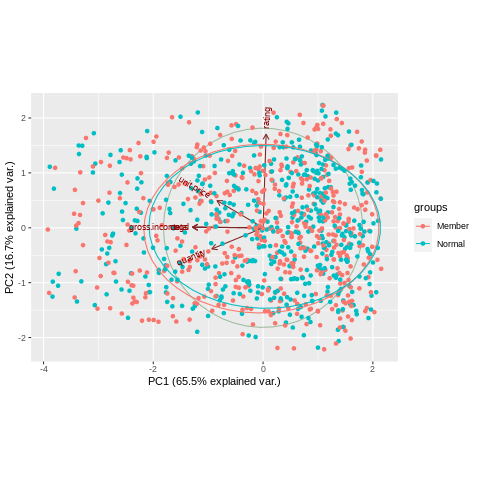

In [95]:
%%R

ggbiplot(pca, obs.scale = 0.5, var.scale = 0.5, groups = sales1_date$customer.type,ellipse = TRUE, circle = TRUE)


we see that whether the customer is loyal or new customer the four variables will explain 65.5% plus 16.7% making it 81.2 variance which is fairly high.

## Part 2: Feature Selection

### Wrapper Method

In [89]:
%%R

# Installing and loading our clustvarsel package
                         
install.packages('clustvarsel')

# Installing and loading our mclust package
library('mclust')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘mclust’, ‘BMA’, ‘foreach’, ‘iterators’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/DEoptimR_1.0-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 36148 bytes (35 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [90]:
%%R
# Sequential forward greedy search (default)
# ---
#
library('clustvarsel')

out = clustvarsel(sales1_numt)
out

R[write to console]: Package 'clustvarsel' version 2.3.4

R[write to console]: Type 'citation("clustvarsel")' for citing this R package in publications.



iter 1
+ adding step
       Var  BICdiff Step Decision
1 quantity 687.4466  Add Accepted
iter 2
+ adding step
   Var  BICdiff Step Decision
2 cogs 1083.013  Add Accepted
iter 3 
+ adding step
- removing step
         Var  BICdiff   Step Decision
3 unit.price 2812.373    Add Accepted
4 unit.price 2812.373 Remove Rejected
iter 4 
+ adding step
- removing step
         Var   BICdiff   Step Decision
5     rating -184.0917    Add Rejected
6 unit.price 2812.3733 Remove Rejected
final iter
* fitting model on selected subset
------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G   BICdiff Decision
          quantity          Add  -4308.761     E 9  687.4466 Accepted
              cogs          Add -16306.851   VEV 9 1083.0132 Accepted
        unit.price          Add -21393.079   EVV 7 2812.3

we  see that the columns quantity,cogs and unitprice have been accepted and can be used for modelling.This is a more accurate way of feature selection.

In [91]:
%%R
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables quantity, unit price, cogs
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:
# ---
#

Subset1 = sales1_numt[,out$subset]
mod = Mclust(Subset1)
summary(mod)

fitting ...
  |======================================================================| 100%
---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 7 components: 

 log-likelihood    n df       BIC       ICL
      -10478.95 1000 63 -21393.08 -21446.89

Clustering table:
  1   2   3   4   5   6   7 
173 134 126 148 128 142 149 


# 7. Recommendation

From Dimentionality reduction model:
1.Quantity
2.Unit price
3.gross income
4.rating

feater selection model:
1.Quantity 
2.Cogs
3.Unit price

The feature selection model gave us the best outcome for consideration of what impact the sales in carefour kenya.
